In [1]:
import numpy as np
import cvxpy as cp

# import plotly.graph_objects as go
# import plotly.io as pio

# pio.renderers.default = "notebook"
import matplotlib.pyplot as plt

# (1)


In [2]:
Positive = np.array([[3, 5], [5, 6], [6, 2.3]])
Negative = np.array([[1.5, 3], [2.5, 1]])

pn, dim = Positive.shape
nn, _ = Negative.shape

In [3]:
H = np.pad((1 / 2) * np.eye(dim), ((0, 1), (0, 1)), mode="constant", constant_values=0)
A = np.pad(
    np.vstack([Positive, Negative]),
    ((0, 0), (0, 1)),
    mode="constant",
    constant_values=1,
)
A *= -np.vstack([np.ones([pn, 1]), -np.ones([nn, 1])])
b = -np.ones(pn + nn)

In [4]:
X = cp.Variable(dim + 1)
res = cp.Problem(cp.Minimize(cp.QuadForm(X, H)), [A @ X <= b]).solve()
display(res, X.value)

np.float64(0.32256627311205216)

array([ 0.53731343,  0.59701493, -3.59701493])

In [5]:
num = 1000
eps = 10 ** (-6)

In [6]:
suprt_vects = np.vstack(
    [
        Positive[abs(Positive @ X.value[:2] + X.value[2] - 1) < eps],
        Negative[abs(Negative @ X.value[:2] + X.value[2] + 1) < eps],
    ]
)

In [7]:
# fig = go.Figure()

# fig.add_trace(
#     go.Scatter(
#         x=Positive[:, 0],
#         y=Positive[:, 1],
#         mode="markers",
#         marker=dict(symbol="circle", color="blue"),
#         name="Positive",
#     )
# )
# fig.add_trace(
#     go.Scatter(
#         x=Negative[:, 0],
#         y=Negative[:, 1],
#         mode="markers",
#         marker=dict(symbol="x", color="red"),
#         name="Negative",
#     )
# )

# x_vals = np.linspace(1, 7, num)
# fig.add_trace(
#     go.Scatter(
#         x=x_vals,
#         y=-(X.value[0] * x_vals + X.value[2]) / X.value[1],
#         mode="lines",
#         name="Decision boundary",
#     )
# )
# fig.add_trace(
#     go.Scatter(
#         x=x_vals,
#         y=(-(X.value[0] * x_vals + X.value[2]) + 1) / X.value[1],
#         mode="lines",
#         line=dict(dash="dash"),
#         name="Margin (+1)",
#     )
# )
# fig.add_trace(
#     go.Scatter(
#         x=x_vals,
#         y=(-(X.value[0] * x_vals + X.value[2]) - 1) / X.value[1],
#         mode="lines",
#         line=dict(dash="dash"),
#         name="Margin (-1)",
#     )
# )

# fig.add_trace(
#     go.Scatter(
#         x=suprt_vects[:, 0],
#         y=suprt_vects[:, 1],
#         mode="markers",
#         marker=dict(symbol="circle-open", color="cyan"),
#         name="Support vectors",
#     )
# )

# fig.update_layout(
#     title="SVM",
#     xaxis_title="x(1)",
#     yaxis_title="x(2)",
#     showlegend=True,
#     width=800,
#     height=600,
# )
# fig.show()

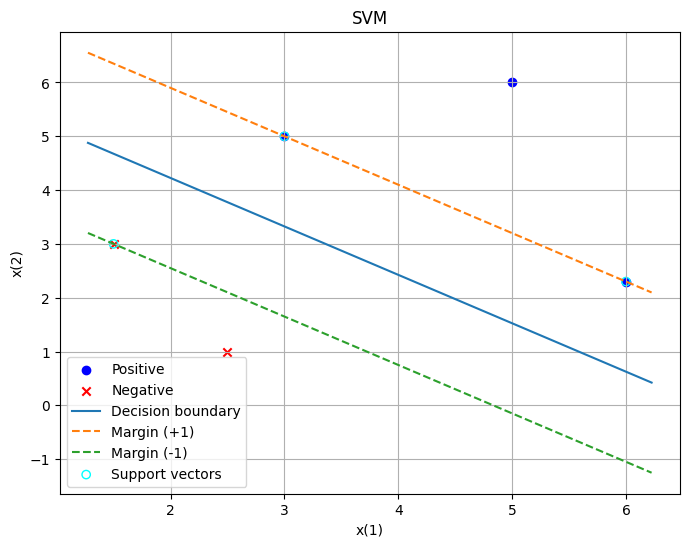

In [8]:
plt.figure(figsize=(8, 6))

plt.scatter(Positive[:, 0], Positive[:, 1], marker="o", c="blue", label="Positive")
plt.scatter(Negative[:, 0], Negative[:, 1], marker="x", c="red", label="Negative")

x1_min, x1_max = plt.xlim()
x_vals = np.linspace(x1_min, x1_max, num)
plt.plot(
    x_vals,
    -(X.value[0] * x_vals + X.value[2]) / X.value[1],
    linestyle="-",
    label="Decision boundary",
)
plt.plot(
    x_vals,
    (-(X.value[0] * x_vals + X.value[2]) + 1) / X.value[1],
    linestyle="--",
    label="Margin (+1)",
)
plt.plot(
    x_vals,
    (-(X.value[0] * x_vals + X.value[2]) - 1) / X.value[1],
    linestyle="--",
    label="Margin (-1)",
)

plt.scatter(
    suprt_vects[:, 0],
    suprt_vects[:, 1],
    facecolors="none",
    edgecolors="cyan",
    label="Support vectors",
)

plt.xlabel("x(1)")
plt.ylabel("x(2)")
plt.title("SVM")
plt.legend()
plt.grid(True)
plt.show()

# (2)


In [9]:
Positive = np.array([[4, 6.5], [5, 6], [4, 1.2]])
Negative = np.array([[1.5, 3], [2.5, 1]])

pn, dim = Positive.shape
nn, _ = Negative.shape

In [10]:
H = np.pad((1 / 2) * np.eye(dim), ((0, 1), (0, 1)), mode="constant", constant_values=0)
A = np.pad(
    np.vstack([Positive, Negative]),
    ((0, 0), (0, 1)),
    mode="constant",
    constant_values=1,
)
A *= -np.vstack([np.ones([pn, 1]), -np.ones([nn, 1])])
b = -np.ones(pn + nn)

In [11]:
X = cp.Variable(dim + 1)
res = cp.Problem(cp.Minimize(cp.QuadForm(X, H)), [A @ X <= b]).solve()
display(res, X.value)

np.float64(0.8733624454148474)

array([ 1.31004367,  0.17467249, -4.44978166])

In [12]:
num = 1000
eps = 10 ** (-6)

In [13]:
suprt_vects = np.vstack(
    [
        Positive[abs(Positive @ X.value[:2] + X.value[2] - 1) < eps],
        Negative[abs(Negative @ X.value[:2] + X.value[2] + 1) < eps],
    ]
)

In [14]:
# fig = go.Figure()

# fig.add_trace(
#     go.Scatter(
#         x=Positive[:, 0],
#         y=Positive[:, 1],
#         mode="markers",
#         marker=dict(symbol="circle", color="blue"),
#         name="Positive",
#     )
# )
# fig.add_trace(
#     go.Scatter(
#         x=Negative[:, 0],
#         y=Negative[:, 1],
#         mode="markers",
#         marker=dict(symbol="x", color="red"),
#         name="Negative",
#     )
# )

# x_vals = np.linspace(1, 6, num)
# fig.add_trace(
#     go.Scatter(
#         x=x_vals,
#         y=-(X.value[0] * x_vals + X.value[2]) / X.value[1],
#         mode="lines",
#         name="Decision boundary",
#     )
# )
# fig.add_trace(
#     go.Scatter(
#         x=x_vals,
#         y=(-(X.value[0] * x_vals + X.value[2]) + 1) / X.value[1],
#         mode="lines",
#         line=dict(dash="dash"),
#         name="Margin (+1)",
#     )
# )
# fig.add_trace(
#     go.Scatter(
#         x=x_vals,
#         y=(-(X.value[0] * x_vals + X.value[2]) - 1) / X.value[1],
#         mode="lines",
#         line=dict(dash="dash"),
#         name="Margin (-1)",
#     )
# )

# fig.add_trace(
#     go.Scatter(
#         x=suprt_vects[:, 0],
#         y=suprt_vects[:, 1],
#         mode="markers",
#         marker=dict(symbol="circle-open", color="cyan"),
#         name="Support vectors",
#     )
# )

# fig.update_layout(
#     title="SVM",
#     xaxis_title="x(1)",
#     yaxis_title="x(2)",
#     showlegend=True,
#     width=800,
#     height=600,
# )
# fig.show()

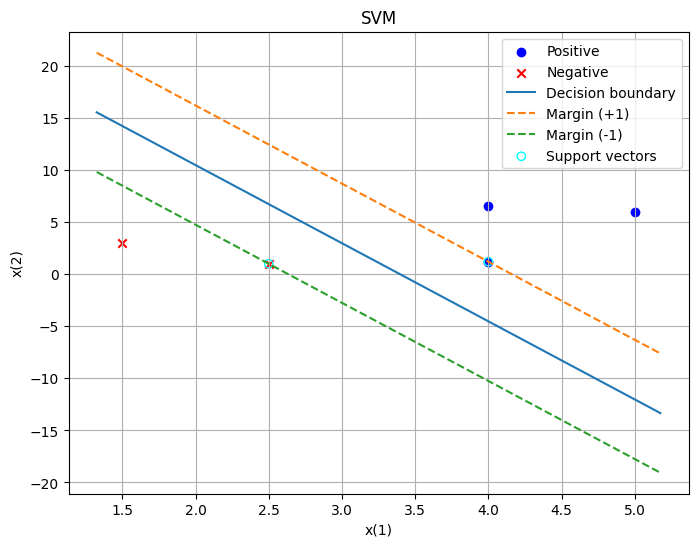

In [15]:
plt.figure(figsize=(8, 6))

plt.scatter(Positive[:, 0], Positive[:, 1], marker="o", c="blue", label="Positive")
plt.scatter(Negative[:, 0], Negative[:, 1], marker="x", c="red", label="Negative")

x1_min, x1_max = plt.xlim()
x_vals = np.linspace(x1_min, x1_max, num)
plt.plot(
    x_vals,
    -(X.value[0] * x_vals + X.value[2]) / X.value[1],
    linestyle="-",
    label="Decision boundary",
)
plt.plot(
    x_vals,
    (-(X.value[0] * x_vals + X.value[2]) + 1) / X.value[1],
    linestyle="--",
    label="Margin (+1)",
)
plt.plot(
    x_vals,
    (-(X.value[0] * x_vals + X.value[2]) - 1) / X.value[1],
    linestyle="--",
    label="Margin (-1)",
)

plt.scatter(
    suprt_vects[:, 0],
    suprt_vects[:, 1],
    facecolors="none",
    edgecolors="cyan",
    label="Support vectors",
)

plt.xlabel("x(1)")
plt.ylabel("x(2)")
plt.title("SVM")
plt.legend()
plt.grid(True)
plt.show()